In [1]:
!pip install -q datascience                  
!pip install -q pandas-profiling              

In [2]:
!pip install -q --upgrade pandas-profiling

In [3]:
!pip install imblearn

Defaulting to user installation because normal site-packages is not writeable


In [4]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis) 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
from scipy.stats import randint as sp_randint                       # for initializing random integer values
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
from matplotlib.pylab import rcParams                               # Backend used for rendering and GUI integration                                               
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------   
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
# For calculating the accuracy for the model
                            
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")      

C:\Users\user\AppData\Local\Temp\ipykernel_13328\3026287180.py:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)


In [5]:
data = pd.read_csv("Churn_train.csv")
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70000,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90000,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15000,4681.75,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45000,6300.85,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Electronic check,70.40000,2044.75,No


In [6]:
print("Shape of our Data is :", data.shape)
print("Number of Rows are :",data.shape[0])
print("Number of Columns are :",data.shape[1])

Shape of our Data is : (5634, 21)
Number of Rows are : 5634
Number of Columns are : 21


In [7]:
data.info(verbose = True, memory_usage='deep', null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.00000,5634.00000,5634.00000
mean,0.16187,32.27796,64.77913
std,0.36837,24.55521,30.10499
min,0.00000,0.00000,18.25000
25%,0.00000,9.00000,35.40000
50%,0.00000,29.00000,70.37500
75%,0.00000,55.00000,89.85000
max,1.00000,72.00000,118.65000


In [9]:
data.TotalCharges = pd.to_numeric(data.TotalCharges, errors='coerce')
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        8
Churn               0
dtype: int64

In [10]:
data.dropna(inplace = True)

In [11]:
data.duplicated().sum()

0

In [12]:
(data.isnull().sum()/data.shape[0])*100

customerID         0.00000
gender             0.00000
SeniorCitizen      0.00000
Partner            0.00000
Dependents         0.00000
tenure             0.00000
PhoneService       0.00000
MultipleLines      0.00000
InternetService    0.00000
OnlineSecurity     0.00000
OnlineBackup       0.00000
DeviceProtection   0.00000
TechSupport        0.00000
StreamingTV        0.00000
StreamingMovies    0.00000
Contract           0.00000
PaperlessBilling   0.00000
PaymentMethod      0.00000
MonthlyCharges     0.00000
TotalCharges       0.00000
Churn              0.00000
dtype: float64

In [13]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

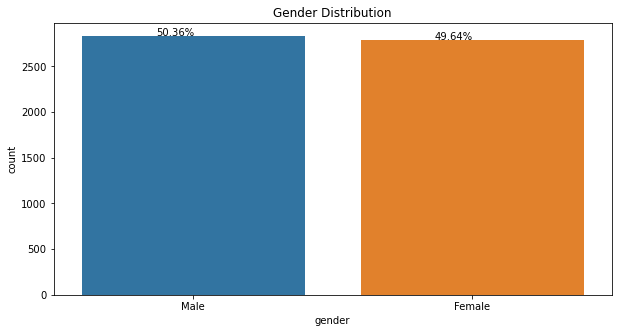

In [14]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='gender',data=data)
total = data.shape[0]

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 3
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))
    
plt.title('Gender Distribution')
plt.show()

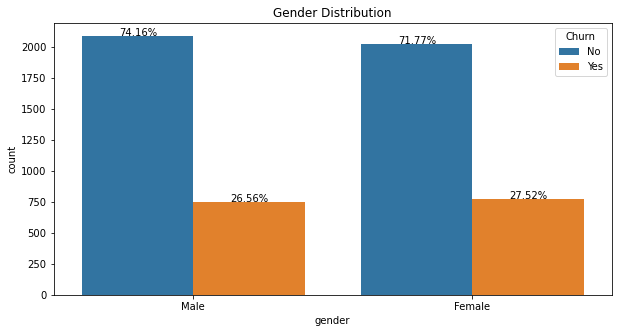

In [15]:
plt.figure(figsize=(10,5))
ax=sns.countplot(x='gender',hue='Churn',data=data)
total = data.shape[0]

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()*2 / total)
    x = p.get_x() + p.get_width() / 3
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))
    
plt.title('Gender Distribution')
plt.show()

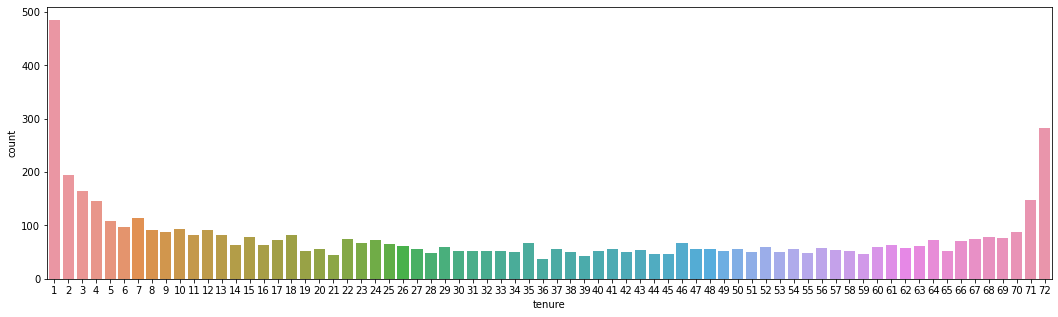

In [16]:
plt.figure(figsize=(18,5))
ax=sns.countplot(x='tenure',data=data)
plt.show()

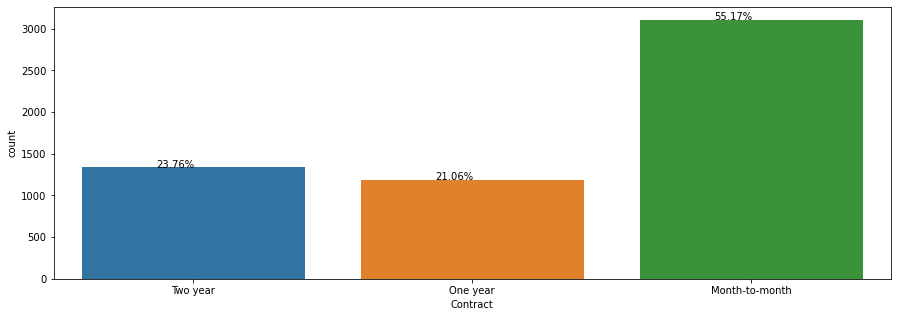

In [17]:
plt.figure(figsize=(15,5))
ax=sns.countplot(x='Contract',data=data)
total = data.shape[0]

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 3
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))
plt.show()

In [18]:
data['Contract'].value_counts()

Month-to-month    3104
Two year          1337
One year          1185
Name: Contract, dtype: int64

In [19]:
data[data['Contract']=='Month-to-month']['tenure']

5        9
7       28
8        6
9       47
11       2
12       3
13       4
19      33
20       8
22      25
23      23
27       3
32       5
36      24
37       1
38      12
39      40
40      33
43      32
44      24
46      40
47      44
49      34
51      11
52       3
53      53
54       2
56      55
57      32
59      13
60      11
61      53
62      28
63       2
66       1
68      11
69      44
72      10
73      10
75      49
79      62
80      22
82       2
84      33
85      12
88       2
89      35
90      57
91      45
92       4
93       2
94       9
97      20
98      65
99       2
100      9
102      1
103     18
104      1
107     29
108     37
115     10
116      1
119      4
122      3
123     44
126     37
127     18
130     51
131      1
133     60
134      4
135      7
139     26
140     20
141     11
142      1
144      1
145      2
149     14
150      4
151     24
152      8
153     37
156     30
157     40
158     10
159     15
160     37
163     28
169      4

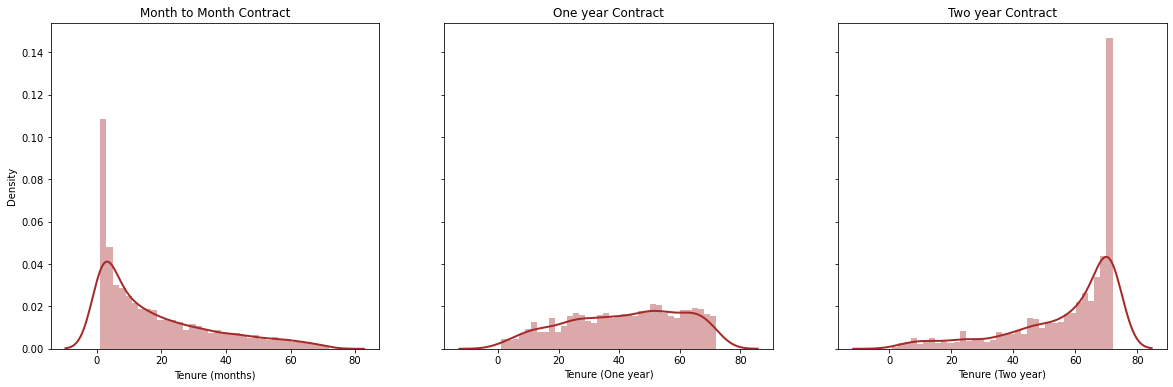

In [20]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True, figsize = (20,6))

ax=sns.distplot(data[data['Contract']=='Month-to-month']['tenure'],hist=True,bins=int(180/5),kde_kws={'linewidth': 2},hist_kws={'linewidth': 2},color='brown',ax=ax1)
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax=sns.distplot(data[data['Contract']=='One year']['tenure'],hist=True,bins=int(180/5),kde_kws={'linewidth': 2},hist_kws={'linewidth': 2},color='brown',ax=ax2)
ax.set_xlabel('Tenure (One year)')
ax.set_title('One year Contract')

ax=sns.distplot(data[data['Contract']=='Two year']['tenure'],hist=True,bins=int(180/5),kde_kws={'linewidth': 2},hist_kws={'linewidth': 2},color='brown',ax=ax3)
ax.set_xlabel('Tenure (Two year)')
ax.set_title('Two year Contract')




plt.show()

In [21]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [22]:
data['SeniorCitizen'].value_counts()

0    4714
1     912
Name: SeniorCitizen, dtype: int64

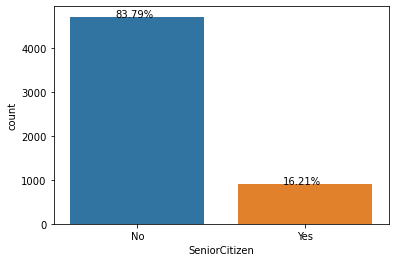

In [23]:
ax=sns.countplot(x='SeniorCitizen',data=data)
total = data.shape[0]

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 3
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))
ax.set_xticklabels(['No','Yes'])
plt.show()

 ***Observation***
> Senior Citizens - There are only 16% of the customers who are senior citizens. Thus most of our customers in the data are younger people.

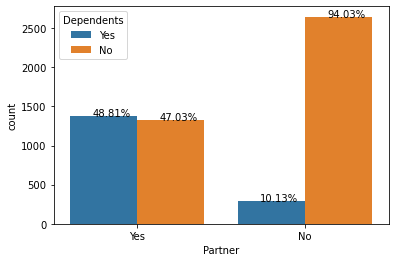

In [24]:
ax=sns.countplot(x='Partner',hue='Dependents',data=data)
total = data.shape[0]

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height()*2 / total)
    x = p.get_x() + p.get_width() / 3
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))
plt.show()

In [25]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [26]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70000,258.35000,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90000,3160.55000,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15000,4681.75000,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45000,6300.85000,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Electronic check,70.40000,2044.75000,No


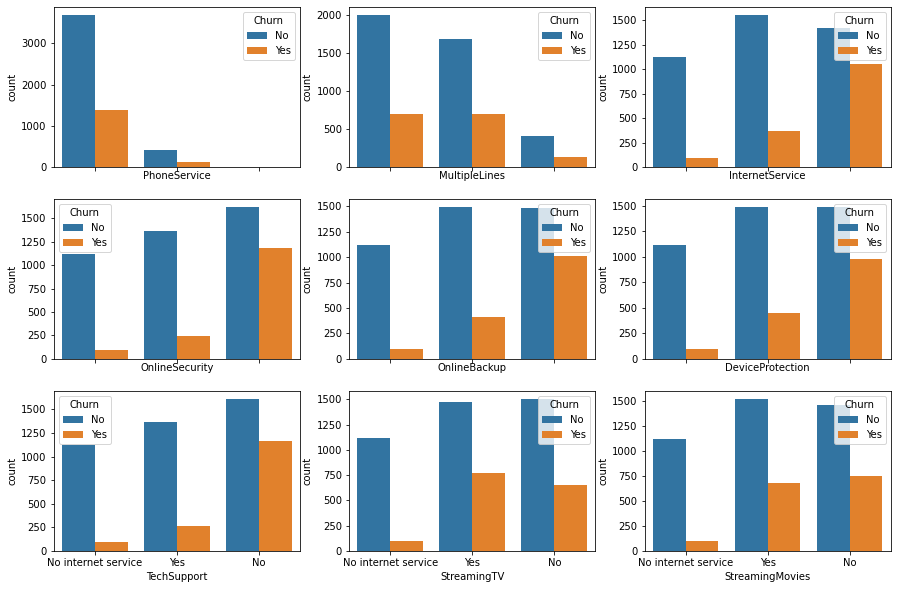

In [27]:
fig, axes= plt.subplots(3,3, figsize = (15, 10),sharex=True)

ax=sns.countplot(data=data,x='PhoneService',hue='Churn',ax=axes[0, 0])

ax=sns.countplot(data=data,x='MultipleLines',hue='Churn',ax=axes[0, 1])

ax=sns.countplot(data=data,x='InternetService',hue='Churn',ax=axes[0, 2])

ax=sns.countplot(data=data,x='OnlineSecurity',hue='Churn',ax=axes[1, 0])

ax=sns.countplot(data=data,x='OnlineBackup',hue='Churn',ax=axes[1, 1])

ax=sns.countplot(data=data,x='DeviceProtection',hue='Churn',ax=axes[1,2])

ax=sns.countplot(data=data,x='TechSupport',hue='Churn',ax=axes[2,0])

ax=sns.countplot(data=data,x='StreamingTV',hue='Churn',ax=axes[2,1])

ax=sns.countplot(data=data,x='StreamingMovies',hue='Churn',ax=axes[2,2])



In [28]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

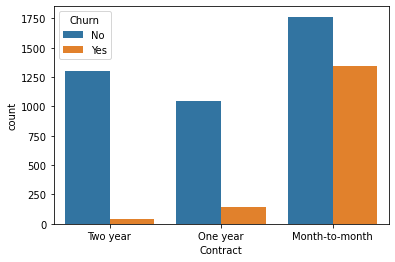

In [29]:
sns.countplot(x='Contract',hue='Churn',data=data)
plt.show()

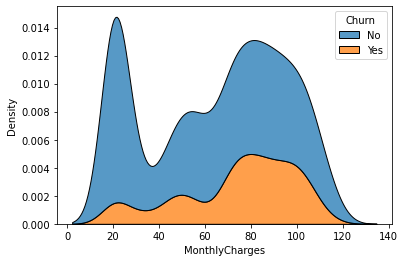

In [30]:
sns.kdeplot(x='MonthlyCharges',hue='Churn',multiple="stack",data=data)
plt.show()

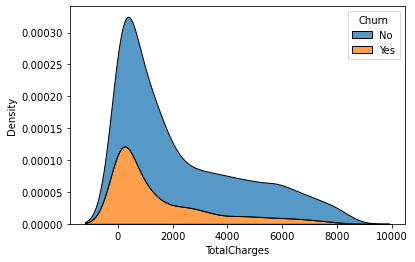

In [31]:
sns.kdeplot(x='TotalCharges',hue='Churn',multiple="stack",data=data)
plt.show()

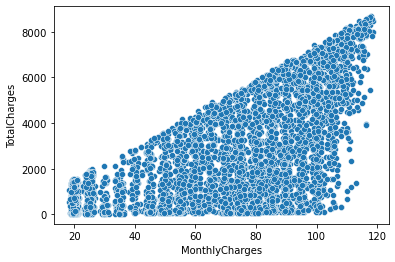

In [32]:
sns.scatterplot(x='MonthlyCharges',y='TotalCharges',data=data)
plt.show()

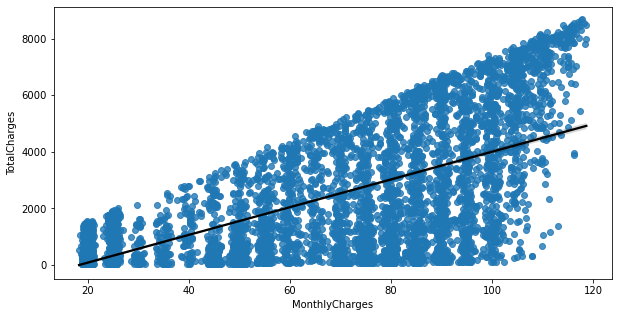

In [33]:
plt.figure(figsize=(10,5))
sns.regplot(x='MonthlyCharges',y='TotalCharges',data=data,line_kws={'color':"black"})
plt.show()

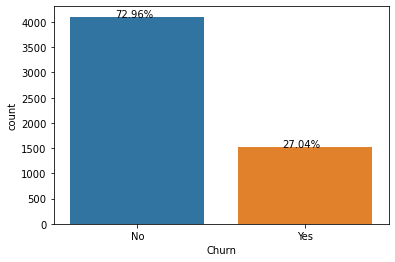

In [34]:
ax=sns.countplot(x='Churn',data=data)
total = data.shape[0]

for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 3
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y))
plt.show()

In [35]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70000,258.35000,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90000,3160.55000,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15000,4681.75000,No
3,6161-ERDGD,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,85.45000,6300.85000,No
4,2364-UFROM,Male,0,No,No,30,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,No,Electronic check,70.40000,2044.75000,No


In [36]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:>

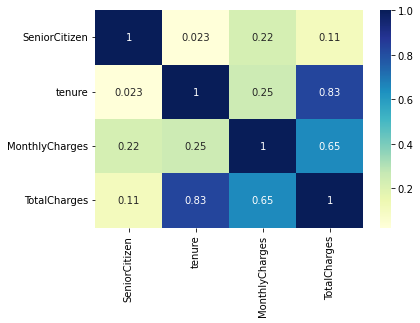

In [37]:

sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)

In [38]:
data=data.drop(['customerID','PaperlessBilling','TotalCharges'],axis=1)

In [39]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,MonthlyCharges,Churn
0,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Mailed check,19.70000,No
1,Female,0,No,No,42,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,Credit card (automatic),73.90000,Yes
2,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Bank transfer (automatic),65.15000,No
3,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Electronic check,85.45000,No
4,Male,0,No,No,30,Yes,No,DSL,Yes,Yes,No,Yes,Yes,No,One year,Electronic check,70.40000,No


In [40]:
cat_col=['gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract',
       'PaymentMethod', 'Churn']

In [41]:
data=pd.get_dummies(data,columns=cat_col,drop_first=True)

In [42]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,12,19.70000,1,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0
1,0,42,73.90000,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,0,1
2,0,71,65.15000,1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,71,85.45000,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,1,0,0
4,0,30,70.40000,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0


In [43]:
X=data.drop('Churn_Yes',axis=1)
y=data['Churn_Yes']


In [44]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,12,19.70000,1,1,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1
1,0,42,73.90000,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,0
2,0,71,65.15000,1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
3,0,71,85.45000,1,1,1,1,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,1,0
4,0,30,70.40000,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0


In [45]:
X.shape,y.shape

((5626, 28), (5626,))

In [46]:
from imblearn.over_sampling import SMOTE

In [47]:
X_res,y_res=SMOTE().fit_resample(X,y)

In [48]:
X_res.tail()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
8205,0,3,100.93893,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0
8206,0,67,110.86889,0,1,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0
8207,0,1,89.28394,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0
8208,0,1,20.18392,1,0,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0
8209,0,1,69.51745,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [49]:
from sklearn.preprocessing import MinMaxScaler
features = X_res.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X_res)
X_res = pd.DataFrame(scaler.transform(X_res))
X_res.columns = features

In [50]:
X_res.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.00000,0.15493,0.01444,1.00000,1.00000,1.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000
1,0.00000,0.57746,0.55428,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000
2,0.00000,0.98592,0.46713,1.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000
3,0.00000,0.98592,0.66932,1.00000,1.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,0.00000,1.00000,1.00000,0.00000,0.00000,1.00000,0.00000
4,0.00000,0.40845,0.51942,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000,0.00000,1.00000,0.00000


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=101)

## Model 1= Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [53]:
y_pred1=LR.predict(X_test)

In [54]:
acc1=accuracy_score(y_test,y_pred1)
print(acc1)

0.8095818107998376


In [56]:
RS1=recall_score(y_test,y_pred1)
print(RS)

0.8379705400981997


In [57]:
PS1=precision_score(y_test,y_pred1)
print(PS)

0.7907335907335907


In [58]:
FS1=f1_score(y_test,y_pred1)
print(FS)

0.8136670639650377


## Model 2 =Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [60]:
y_pred2=RF.predict(X_test)

In [61]:
acc2=accuracy_score(y_test,y_pred2)
print(acc2)

0.833130328867235


In [69]:
RS2=recall_score(y_test,y_pred2)
print(RS2)

0.851063829787234


In [70]:
PS2=precision_score(y_test,y_pred2)
print(PS2)

0.8195429472025216


In [71]:
FS2=f1_score(y_test,y_pred2)
print(FS2)

0.8350060216780409


gender_Male                   0.02769
OnlineBackup_Yes              0.02913
Partner_Yes                   0.03315
InternetService_Fiber optic   0.03651
TechSupport_Yes               0.04144
OnlineSecurity_Yes            0.04669
Contract_One year             0.05624
Contract_Two year             0.08330
tenure                        0.18951
MonthlyCharges                0.19950
dtype: float64


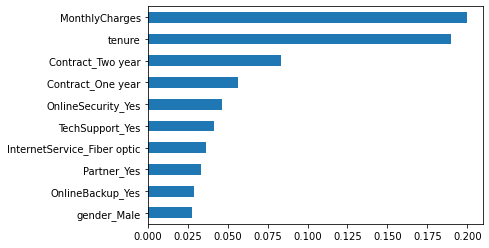

In [65]:

importances = RF.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)
ws=weights.sort_values()[-10:]
print(ws)
ws.plot(kind = 'barh')
plt.show()

## Model 3 = Descision Tree

In [66]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [67]:
y_pred3=DT.predict(X_test)

In [68]:
acc3=accuracy_score(y_test,y_pred3)
print(acc3)

0.7848152659358506


In [72]:
RS3=recall_score(y_test,y_pred3)
print(RS3)

0.7986906710310966


In [73]:
PS3=precision_score(y_test,y_pred3)
print(PS3)

0.7746031746031746


In [74]:
FS3=f1_score(y_test,y_pred3)
print(FS3)

0.7864625302175665


## Model 4= SVC

In [75]:
from sklearn.svm import SVC
SVC=SVC(kernel = 'linear',gamma = 'scale', shrinking = False,)
SVC.fit(X_train,y_train)

SVC(kernel='linear', shrinking=False)

In [76]:
y_pred4=SVC.predict(X_test)

In [77]:
acc4=accuracy_score(y_test,y_pred4)
print(acc4)

0.8144539179861957


In [78]:
RS4=recall_score(y_test,y_pred4)
print(RS4)

0.823240589198036


In [79]:
PS4=precision_score(y_test,y_pred4)
print(PS4)

0.8067361668003208


In [80]:
FS4=f1_score(y_test,y_pred4)
print(FS4)

0.814904819765087


## Model 5= AdaBoost

In [81]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier()
ABC.fit(X_train,y_train)

AdaBoostClassifier()

In [82]:
y_pred5=ABC.predict(X_test)

In [83]:
acc5=accuracy_score(y_test,y_pred5)
print(acc5)

0.8095818107998376


In [84]:
PS5=precision_score(y_test,y_pred5)
print(PS5)

0.7702799712849964


In [85]:
RS5=recall_score(y_test,y_pred5)
print(RS5)

0.8780687397708674


In [86]:
FS5=f1_score(y_test,y_pred5)
print(FS5)

0.8206500956022944


## Model 6= XGBC Classifier 

In [87]:
from xgboost import XGBClassifier
XGBC = XGBClassifier()
XGBC.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [88]:
y_pred6=XGBC.predict(X_test)

In [89]:
acc6=accuracy_score(y_test,y_pred6)
print(acc6)

0.8359723913926106


In [90]:
PS6=precision_score(y_test,y_pred6)
print(PS6)

0.8185358255451713


In [91]:
RS6=recall_score(y_test,y_pred6)
print(RS6)

0.8600654664484452


In [92]:
FS6=f1_score(y_test,y_pred6)
print(FS6)

0.8387869114126097


In [94]:
score_data=pd.DataFrame({'Models':['LR','RF','DT','SVC','ABC','XGBC'],'Accuracy Score':[acc1,acc2,acc3,acc4,acc5,acc6],'F1 Score':[FS1,FS2,FS3,FS4,FS5,FS6]})
score_data

,Models,Accuracy Score,F1 Score
0,LR,0.80958,0.81367
1,RF,0.83313,0.83501
2,DT,0.78482,0.78646
3,SVC,0.81445,0.81490
4,ABC,0.80958,0.82065
5,XGBC,0.83597,0.83879


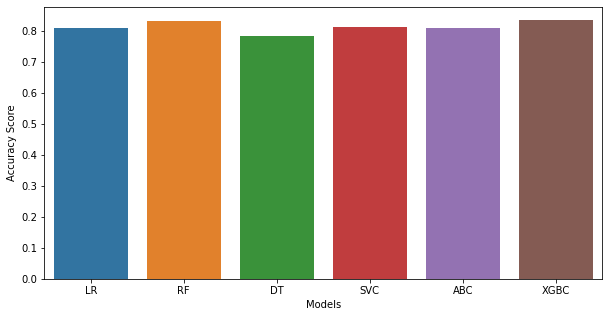

In [97]:
plt.figure(figsize=(10,5))
sns.barplot(x='Models',y='Accuracy Score',data=score_data) 
plt.show()

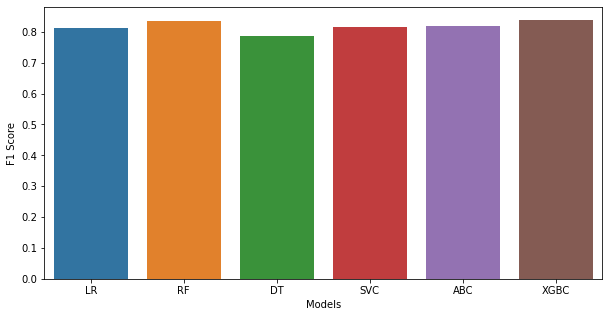

In [96]:
plt.figure(figsize=(10,5))
sns.barplot(x='Models',y='F1 Score',data=score_data) 
plt.show()

In [98]:
test=pd.read_csv("Churn_test.csv")

In [99]:
test.shape

(1409, 20)

In [100]:
test.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,8879-ZKJOF,Female,0,No,No,41,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),79.85000,3320.75
1,0201-MIBOL,Female,1,No,No,66,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),102.40000,6471.85
2,1600-DILPE,Female,0,No,No,12,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),45.00000,524.35
3,8601-QACRS,Female,0,No,No,5,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,50.60000,249.95
4,7919-ZODZZ,Female,0,Yes,Yes,10,Yes,No,DSL,No,Yes,Yes,No,No,Yes,One year,Yes,Mailed check,65.90000,660.05


In [101]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        1409 non-null   object 
 1   gender            1409 non-null   object 
 2   SeniorCitizen     1409 non-null   int64  
 3   Partner           1409 non-null   object 
 4   Dependents        1409 non-null   object 
 5   tenure            1409 non-null   int64  
 6   PhoneService      1409 non-null   object 
 7   MultipleLines     1409 non-null   object 
 8   InternetService   1409 non-null   object 
 9   OnlineSecurity    1409 non-null   object 
 10  OnlineBackup      1409 non-null   object 
 11  DeviceProtection  1409 non-null   object 
 12  TechSupport       1409 non-null   object 
 13  StreamingTV       1409 non-null   object 
 14  StreamingMovies   1409 non-null   object 
 15  Contract          1409 non-null   object 
 16  PaperlessBilling  1409 non-null   object 


In [102]:
test.duplicated().any()

False

In [103]:
customerID=test['customerID']
test=test.drop(['customerID','PaperlessBilling','TotalCharges'],axis=1)

In [104]:
cat_col1=['gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract',
       'PaymentMethod']

In [105]:
test=pd.get_dummies(test,columns=cat_col1,drop_first=True)

In [106]:
test.head()

,SeniorCitizen,tenure,MonthlyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,41,79.85000,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,0,0
1,1,66,102.40000,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0
2,0,12,45.00000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,5,50.60000,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,10,65.90000,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1


In [107]:
model_XGBC=XGBC.predict(test)

In [108]:
np.unique(model_XGBC)

array([0, 1])

In [109]:
print(model_XGBC)

[1 0 1 ... 0 1 1]


In [110]:
submission = pd.DataFrame({'customerID': customerID, 'Churn': model_XGBC})
# you could use any filename. We choose submission here
submission.to_csv('submission.csv', index=False, header=False)